# Compare Betti curves

Once all Betti curves are computed for all images, we can explore comparisons. Rieck et al (2020) showcase techniques to statistically determine whether two Betti curves come from the same shape distribution or not.

- Compare different tissues
- Compare real tissue vs random simulations

---

- B. Rieck, F. Sadlo, H. Leitte (2020) Topological Machine Learning with Persistence Indicator Functions. [DOI: 10.1007/978-3-030-43036-8_6](https://doi.org/10.1007/978-3-030-43036-8_6)

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
src = '../results/'
datafiles = sorted(glob.glob(src + '*/'))
dst = '../results/'

In [5]:
datafiles

['../results/leaf_25d_WT2/',
 '../results/leaf_25d_WT4/',
 '../results/leaf_25d_WT4_random/',
 '../results/sepal/',
 '../results/sepal_random/']

In [6]:
didx = 1

obufiles = sorted(glob.glob(datafiles[didx] + 'betti*bottom_up.csv'))
otdfiles = sorted(glob.glob(datafiles[didx] + 'betti*top_down.csv'))

rbufiles = sorted(glob.glob(datafiles[didx+1] + 'betti*bottom_up.csv'))
rtdfiles = sorted(glob.glob(datafiles[didx+1] + 'betti*top_down.csv'))

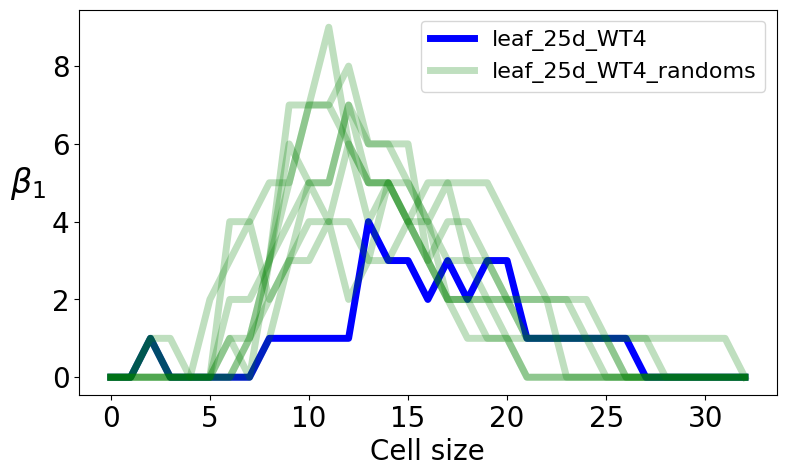

In [37]:
fs=20

fig, ax = plt.subplots(1,1,figsize=(9,5))

for i in range(len(obufiles)):
    obetti = pd.read_csv(obufiles[i]).values.T
    ax.plot(obetti[1], c='b', lw=5, label=obufiles[i].split(os.sep)[-2])

for i in range(len(rbufiles)):
    rbetti = pd.read_csv(rbufiles[i]).values.T
    ax.plot(rbetti[1], c='g', lw=5, alpha = 0.25, label=rbufiles[i].split(os.sep)[-2] + 's')

ax.set_ylabel('$\\beta_{{1}}$', fontsize=1.2*fs, rotation=0, ha='right')
ax.set_xlabel('Cell size', fontsize=fs)
ax.tick_params(labelsize=fs, labelrotation=0)
h,l = ax.get_legend_handles_labels()
ax.legend(h[:2], l[:2], fontsize=.8*fs)

filename = dst + 'betti_1.pdf'
plt.savefig(filename, format='pdf', dpi=150, bbox_inches='tight')

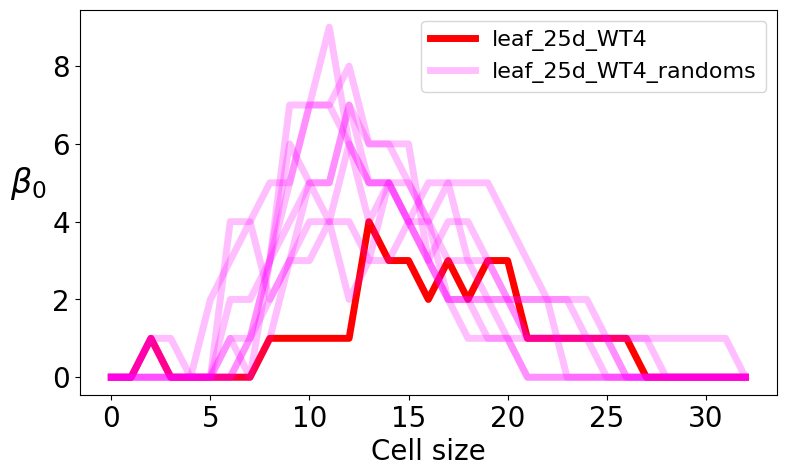

In [38]:
fig, ax = plt.subplots(1,1,figsize=(9,5))

for i in range(len(otdfiles)):
    obetti = pd.read_csv(obufiles[i]).values.T
    ax.plot(obetti[1], c='r', lw=5, label=obufiles[i].split(os.sep)[-2])

for i in range(len(rtdfiles)):
    rbetti = pd.read_csv(rbufiles[i]).values.T
    ax.plot(rbetti[1], c='magenta', lw=5, alpha = 0.25, label=rbufiles[i].split(os.sep)[-2] + 's')

ax.set_ylabel('$\\beta_{{0}}$', fontsize=1.2*fs, rotation=0, ha='right')
ax.set_xlabel('Cell size', fontsize=fs)
ax.tick_params(labelsize=fs, labelrotation=0)
h,l = ax.get_legend_handles_labels()
ax.legend(h[:2], l[:2], fontsize=.8*fs)

filename = dst + 'betti_0.pdf'
plt.savefig(filename, format='pdf', dpi=150, bbox_inches='tight')